### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
data = pd.read_csv(r'C:\Users\marti\OneDrive\Documents\GitHub\Read_Martin_DA301_Assignment\Data\turtle_reviews.csv')  
reviews = pd.DataFrame(data)

# View the DataFrame.
reviews.head(5)

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.info()

# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Explore the data.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
reviews.drop(columns=['language', 'platform'], inplace=True)
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.columns = ['gender','age', 'remuneration', 'spending_score', 'loyalty_points','education', 'product','review','summary']

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv', index=False)

In [12]:
# Import new CSV file with Pandas.
reviews2 = pd.read_csv('reviews.csv')
reviews2 = pd.DataFrame(reviews2)

# View DataFrame.
reviews2.head(5)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [55]:
# Independent variable.
x = reviews2['spending_score']

# Dependent variable.
y = reviews2['loyalty_points']

# OLS model and summary.
f = 'y ~ x'

test = ols(f, data = reviews2).fit()
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          2.92e-263
Time:                        11:01:27   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

X = test.predict()
# Extract the predicted values.
print("Predicted values: ", X)  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [57]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (33.061693 * x) -75.052663
X = sm.add_constant(X)
model = sm.OLS(y_pred, X)
results = model.fit()

# View the output.
regression_table = results.summary()
print(regression_table)


                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.861e+32
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:01:29   Log-Likelihood:                 51076.
No. Observations:                2000   AIC:                        -1.021e+05
Df Residuals:                    1998   BIC:                        -1.021e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.536e-07   9.15e-14  -7.14e+06      0.0

Text(0, 0.5, 'loyalty points')

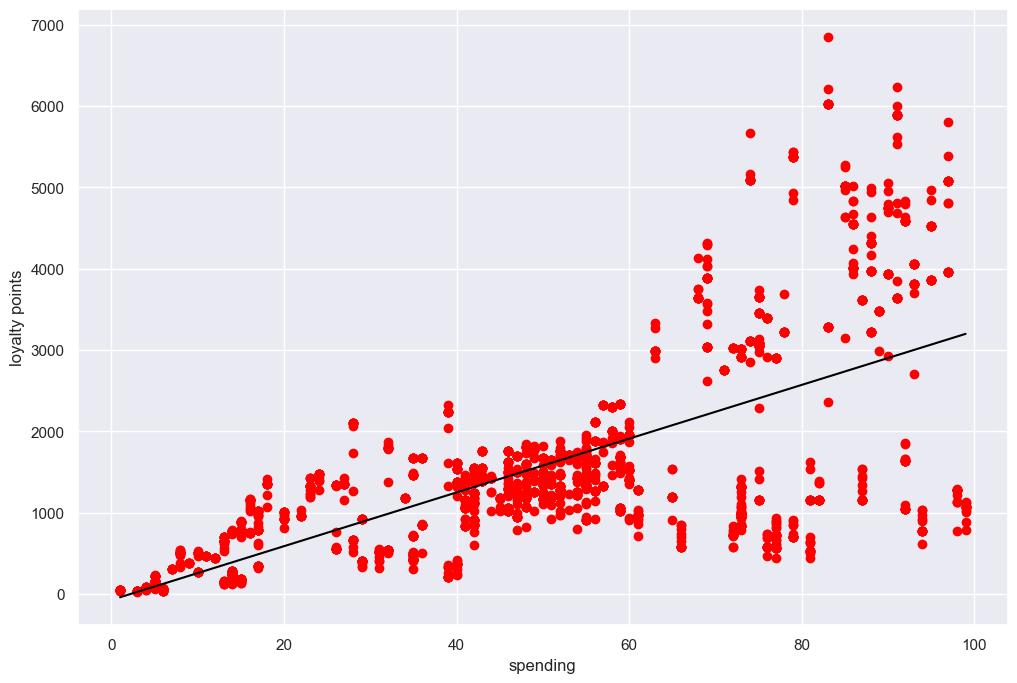

In [58]:
# Plot the graph with a regression line.
plt.scatter(x, y, color='red')

# Regression line calcs:
m, b = np.polyfit(x, y, 1) #'1' is the degreee of polynomial fit
#Generate x-values for the regression line
regression_line_x = np.array([min(x), max(x)])
# Generate y-values for the regression line
regression_line_y = m * regression_line_x + b

# Plot the regression line in black
plt.plot(regression_line_x, regression_line_y, color='black')
plt.xlabel('spending')
plt.ylabel('loyalty points')

### 5b) remuneration vs loyalty

In [24]:
# Independent variable.
x2 = reviews2['remuneration']

# Dependent variable.
y2 = reviews2['loyalty_points']

# OLS model and summary.
f = 'y2 ~ x2'

test2 = ols(f, data = reviews2).fit()
test2.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        17:51:41   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

X = test2.predict()
# Extract the predicted values.
print("Predicted values: ", X)  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [25]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (34.1878 * x2) -65.686
X = sm.add_constant(X)
model = sm.OLS(y_pred, X)
results = model.fit()

# View the output.
regression_table = results.summary()
print(regression_table)


                            OLS Regression Results                            
Dep. Variable:           remuneration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06294
Date:                Thu, 15 Jun 2023   Prob (F-statistic):              0.802
Time:                        17:52:02   Log-Likelihood:                -16183.
No. Observations:                2000   AIC:                         3.237e+04
Df Residuals:                    1998   BIC:                         3.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1569.9156     36.866     42.584      0.0

Text(0, 0.5, 'loyalty points')

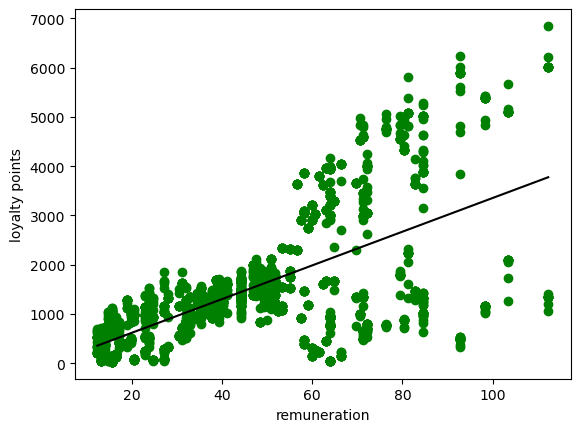

In [26]:
# Plot the graph with a regression line.
plt.scatter(x2, y2, color='green')

# Regression line calcs:
m, b = np.polyfit(x2, y2, 1) #'1' is the degreee of polynomial fit
#Generate x-values for the regression line
regression_line_x = np.array([min(x2), max(x2)])
# Generate y-values for the regression line
regression_line_y = m * regression_line_x + b

# Plot the regression line in black
plt.plot(regression_line_x, regression_line_y, color='black')
plt.xlabel('remuneration')
plt.ylabel('loyalty points')

### 5c) age vs loyalty

In [29]:
# Independent variable.
x3 = reviews2['age']

# Dependent variable.
y3 = reviews2['loyalty_points']

# OLS model and summary.
f = 'y3 ~ x3'

test3 = ols(f, data = reviews2).fit()
test3.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0577
Time:                        17:54:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

X = test3.predict()
# Extract the predicted values.
print("Predicted values: ", X)  


Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [31]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-4.012805 * x3) +1736.517739
X = sm.add_constant(X)
model = sm.OLS(y_pred, X)
results = model.fit()

# View the output.
regression_table = results.summary()
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.335e+28
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:54:56   Log-Likelihood:                 47886.
No. Observations:                2000   AIC:                        -9.577e+04
Df Residuals:                    1998   BIC:                        -9.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.451e-05   6.27e-12   1.03e+07      0.0

Text(0, 0.5, 'loyalty points')

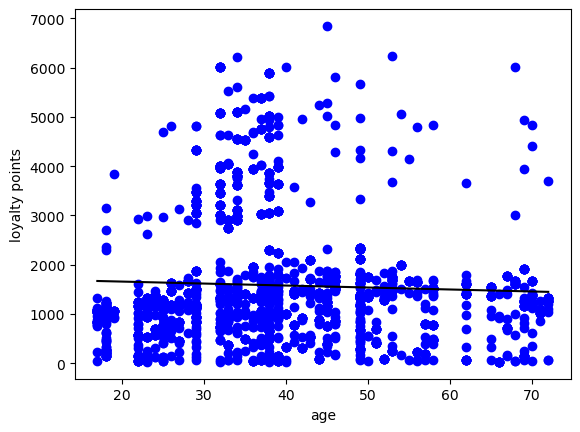

In [32]:
# Plot graph with regression line.
plt.scatter(x3, y3, color='blue')

# Regression line calcs:
m, b = np.polyfit(x3, y3, 1) #'1' is the degreee of polynomial fit
#Generate x-values for the regression line
regression_line_x = np.array([min(x3), max(x3)])
# Generate y-values for the regression line
regression_line_y = m * regression_line_x + b

# Plot the regression line in black
plt.plot(regression_line_x, regression_line_y, color='black')
plt.xlabel('age')
plt.ylabel('loyalty points')

## 6. Observations and insights

***Your observations here...***






In [ ]:
#1) The strongest correlation (R of 0.45 ) was between spending and loyalty points.  Each unit the 'spending score' increased 
# loyalty points by 33 units.

#2) Remuneration showed the second highest correlation coefficient of 0.38. Data points were tightly grouped along the 
# regression line for lower incomes, ie. below £50k. Over £50k the data points are widely dispersed around the regression line.

#3) There appears to be no correlation between age and loyalty points, hence the low R value and high F-statistic.


# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [33]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Load the CSV file(s) as df2.
df2 = data[['gender','remuneration (k£)', 'spending_score (1-100)']]

# View DataFrame.
df2.head(5)

,gender,remuneration (k£),spending_score (1-100)
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40


In [35]:
# Explore the data.
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   remuneration (k£)       2000 non-null   float64
 2   spending_score (1-100)  2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [36]:
# Descriptive statistics.
df2.describe()

,remuneration (k£),spending_score (1-100)
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration (k£)', ylabel='spending_score (1-100)'>

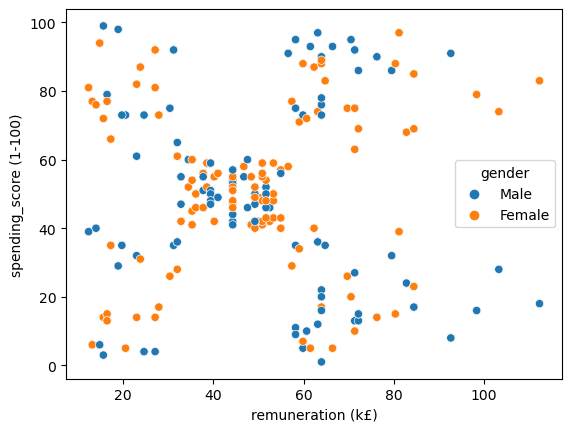

In [37]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration (k£)',
                y='spending_score (1-100)',
                data=df2,
                hue='gender')


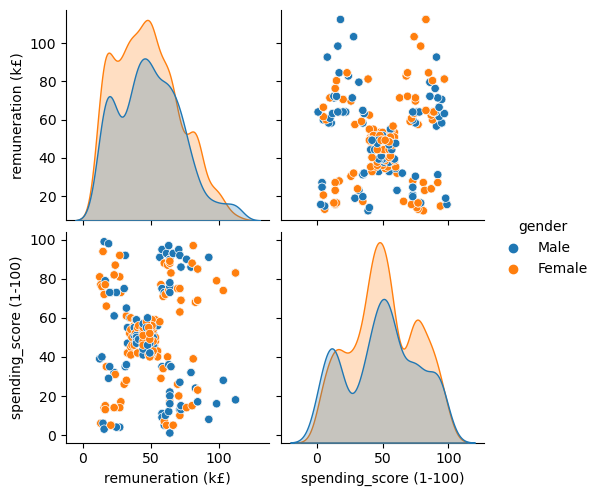

In [38]:
# Create a pairplot with Seaborn.

x = df2[['remuneration (k£)', 'spending_score (1-100)']]

sns.pairplot(df2,
             vars=x,
             hue='gender',
             diag_kind='kde')

## 3. Elbow and silhoutte methods

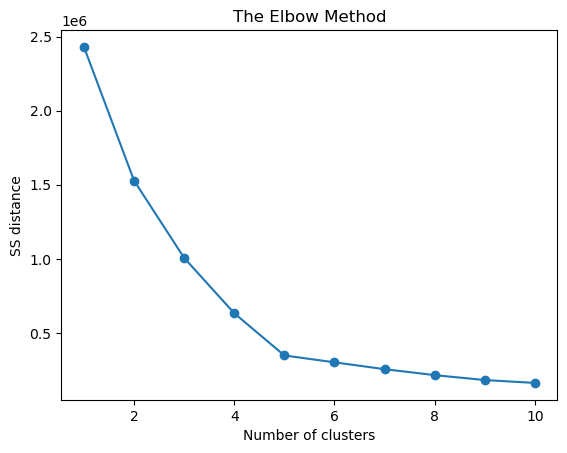

In [39]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Determine the number of clusters: Elbow method.

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',  # improved k-means algorithm
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()


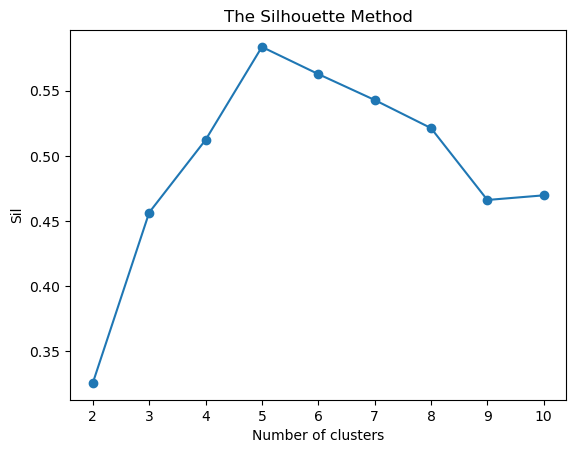

In [40]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

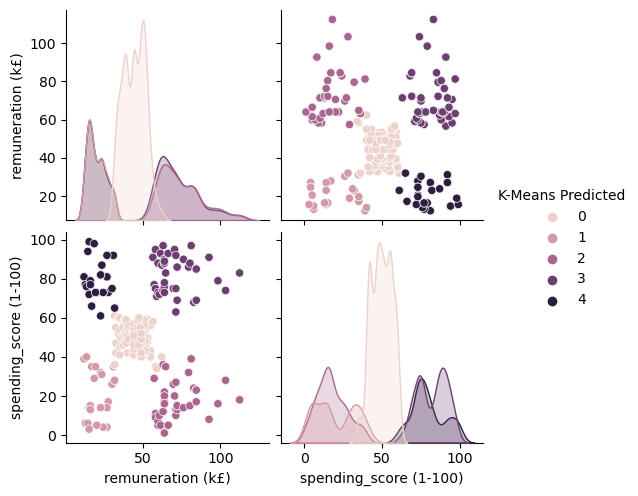

In [41]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

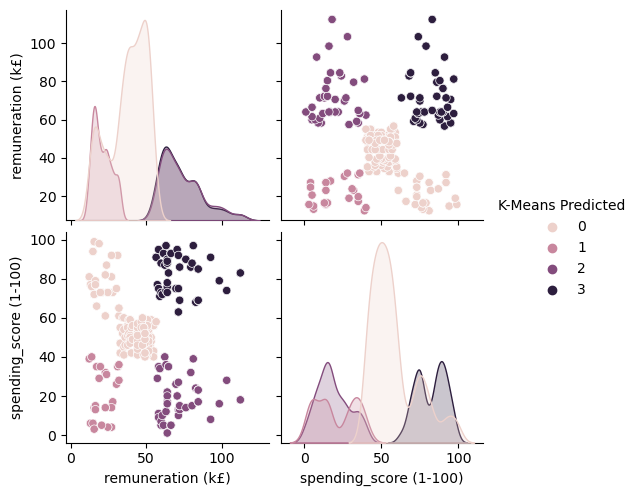

In [42]:
  # Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

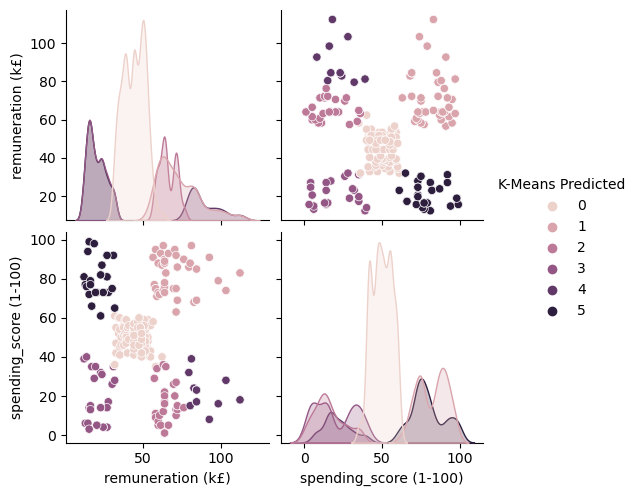

In [45]:
  # Use four clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [ ]:
# Silhouette and Elbow methods both suggest that 5 clusters is the optimum number, as does visual confirmation.

## 5. Fit final model and justify your choice

In [48]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

In [49]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [ ]:
# 6 clusters does not break up the larger group of 774 items. 

## 6. Plot and interpret the clusters

In [50]:
# View the DataFrame.
# View the K-Means predicted.
print(x.head())


   remuneration (k£)  spending_score (1-100)  K-Means Predicted
0              12.30                      39                  1
1              12.30                      81                  4
2              13.12                       6                  1
3              13.12                      77                  4
4              13.94                      40                  1


<AxesSubplot:xlabel='remuneration (k£)', ylabel='spending_score (1-100)'>

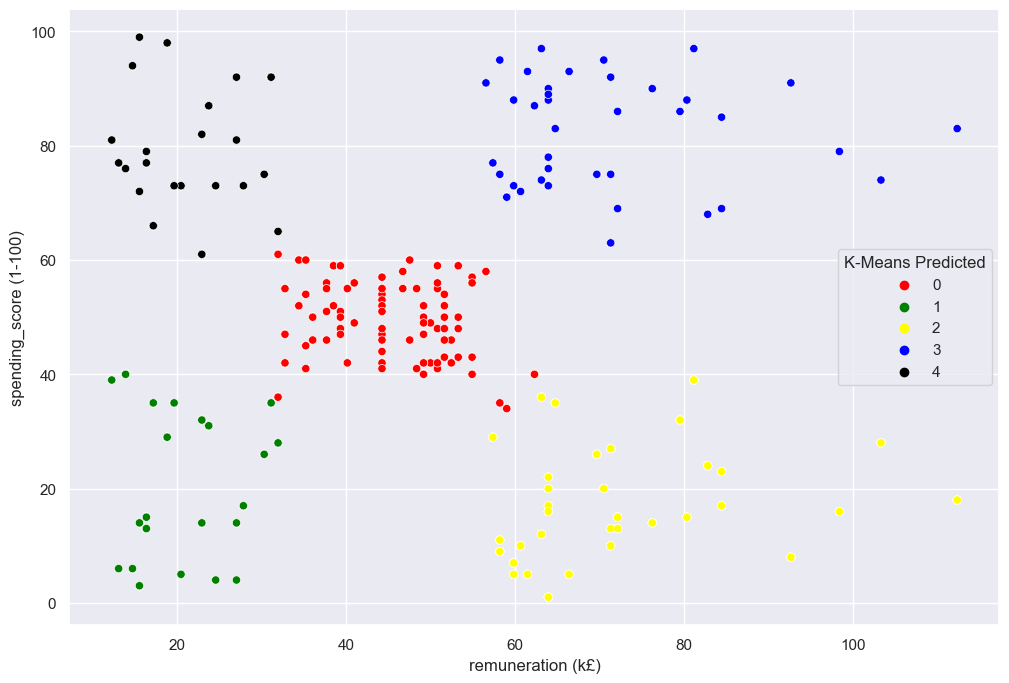

In [51]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x= 'remuneration (k£)', 
                y ='spending_score (1-100)',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'yellow', 'blue', 'black'])

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# K-means is an effective algorithm for splitting the data set into 5 distinct groups.  The group showing high spending in 
# the lower remuneration segment (black dots) should be directly targeted with a tailor-made marketing campaign.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set as df3.

data = pd.read_csv(r'C:\Users\marti\OneDrive\Documents\GitHub\Read_Martin_DA301_Assignment\Data\turtle_reviews.csv')  
df3 = pd.DataFrame(data)

# View DataFrame.
df3.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Explore data set.
df3.describe()
#df3.isnull()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [4]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame
df3.head(5)

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [6]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()
df3['review'].head(5)

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [7]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()
df3['summary'].head(5)

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [8]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [9]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [13]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review'])
df3 = df3.drop_duplicates(subset=['summary'])
#df3.reset_index(inplace=True)

## 3. Tokenise and create wordclouds

In [15]:
# Create new DataFrame (copy DataFrame).
df4 = df3
#df4.drop('level_0', axis=1, inplace=True)
# View DataFrame.
df4.head(5)

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [16]:
# Apply tokenisation to both columns.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df4['review_tokens'] = df4['review'].apply(word_tokenize)
df4['summary_tokens'] = df4['summary'].apply(word_tokenize)
# Preview data.
df4.head(10)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
6,i have bought many gm screens over the years b...,best gm screen ever,"[i, have, bought, many, gm, screens, over, the...","[best, gm, screen, ever]"
8,could be better but its still great i love the...,great but could be even better,"[could, be, better, but, its, still, great, i,...","[great, but, could, be, even, better]"
9,my review will mirror others in that this kind...,another missed opportunity not a value add to...,"[my, review, will, mirror, others, in, that, t...","[another, missed, opportunity, not, a, value, ..."
11,cant wait to use it,love the map,"[cant, wait, to, use, it]","[love, the, map]"
12,this is a campaign specific dm screen meant to...,not a general dm screen,"[this, is, a, campaign, specific, dm, screen, ...","[not, a, general, dm, screen]"


In [17]:
# Review: Create a word cloud.

review_tokens = ''
review_tokens = ''.join([' '.join(tokens) for tokens in df4['review_tokens']])

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens) 

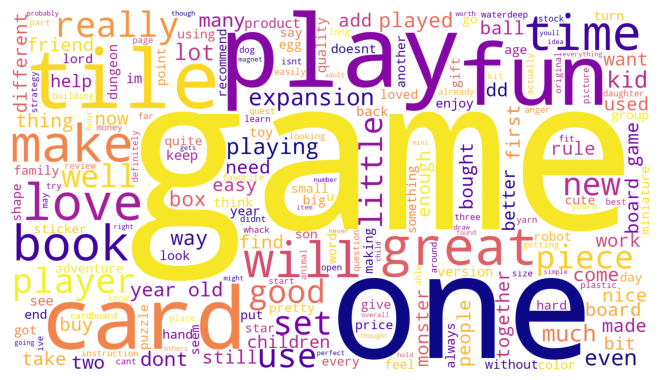

In [18]:
# Review: Plot the WordCloud image.                    
#plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [19]:
# Summary: Create a word cloud.

summary_tokens = ''
summary_tokens = ''.join([' '.join(tokens) for tokens in df4['summary_tokens']])

wordcloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens) 

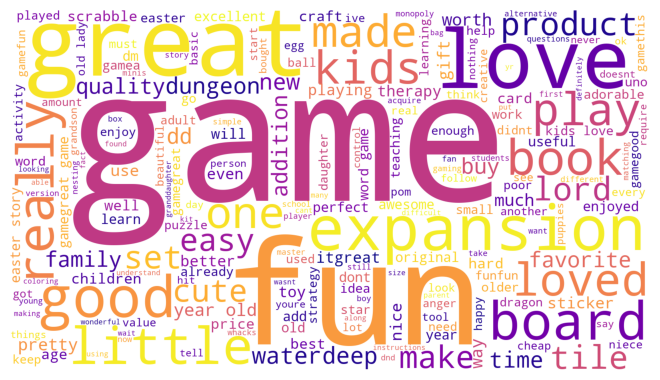

In [20]:
# Summary: Plot the WordCloud image.
plt.imshow(wordcloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [21]:
# Determine the frequency distribution.

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

review_tokens = word_tokenize(review_tokens)
summary_tokens = word_tokenize(summary_tokens)

# Calculate the frequency distribution.
fdist_review = FreqDist(review_tokens)
fdist_summary = FreqDist(summary_tokens)

# Preview data.
fdist_summary


FreqDist({'for': 222, 'the': 215, 'to': 188, 'a': 179, 'game': 156, 'and': 155, 'of': 127, 'is': 100, 'it': 82, 'fun': 80, ...})

### 4b) Remove alphanumeric characters and stopwords

In [22]:
# Delete all the alpanum.
review_tokens = [word for word in review_tokens if word.isalnum()]
summary_tokens = [word for word in summary_tokens if word.isalnum()]


In [23]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens2 = [x for x in review_tokens if x.lower() not in english_stopwords]
summary_tokens2 = [x for x in summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review = ''
tokens2_summary = ''
tokens2_combined = ''

for value in review_tokens2:
    # Add each filtered token word to the string.
    tokens2_review = tokens2_review + value + ' '
    
for value in summary_tokens2:
    tokens2_summary = tokens2_summary + value + ' ' 

for value in summary_tokens2:
    tokens2_combined = tokens2_combined + value + ' ' 
for value in review_tokens2:
    tokens2_combined = tokens2_combined + value + ' ' 
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

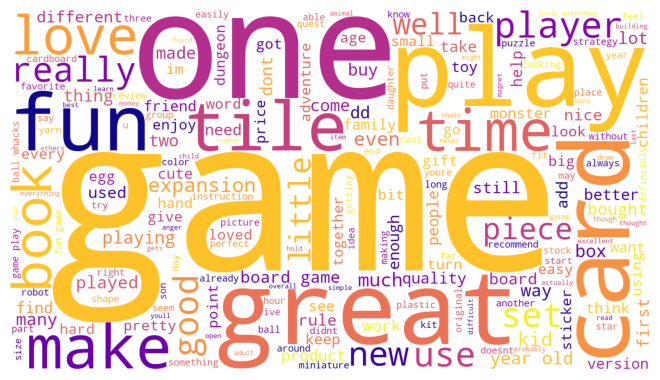

In [24]:
# Wordcloud without stop words: for review words.
wordcloud3 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_combined) 
plt.imshow(wordcloud3) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [25]:
# Determine the 15 most common words: Review column
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(review_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
# Preview data.
counts

,Frequency
Word,
game,1302
one,456
play,427
fun,372
like,369
great,316
get,291
tiles,279
cards,275


In [26]:
# Determine the 15 most common words: Summary column
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(summary_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
# Preview data.
counts

,Frequency
Word,
game,156
fun,80
great,77
like,47
love,43
good,29
expansion,29
old,26
kids,25


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [27]:
# Provided function.

from textblob import TextBlob

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]
def generate_sentiment(comment):
    return TextBlob(comment).sentiment[1]

In [28]:
# Determine polarity of both columns. 

# Populate a new column with polarity scores for each comment.
df3['review_polarity'] = df3['review'].apply(generate_polarity)
df3['summary_polarity'] = df3['summary'].apply(generate_polarity)
df3['review_sentiment'] = df3['review'].apply(generate_sentiment)
df3['summary_sentiment'] = df3['summary'].apply(generate_sentiment)

# Preview the result.
df3.head(5)

# Averages
average = df3['review_polarity'].mean()
average2 = df3['summary_polarity'].mean()
average3 = df3['review_sentiment'].mean()
average4 = df3['summary_sentiment'].mean()
print("Average review polarity:", average)
print("Average summary polarity:", average2)
print("Average review sentiment:", average3)
print("Average summary sentiment:", average4)


Average review polarity: 0.18117032669788732
Average summary polarity: 0.27170366898359893
Average review sentiment: 0.5134322803898315
Average summary sentiment: 0.48326250387314224


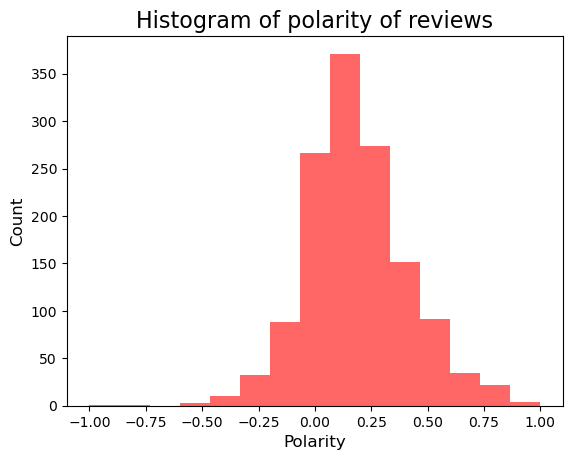

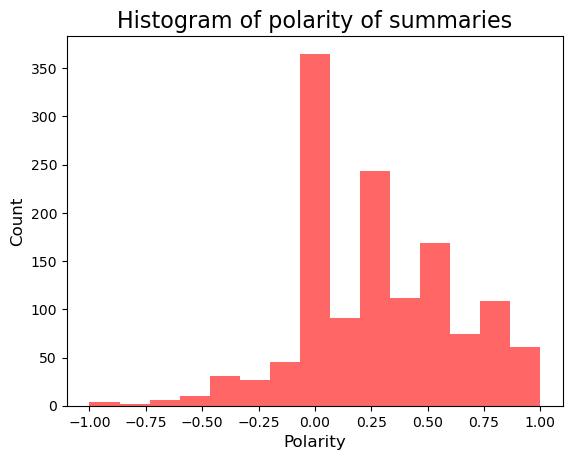

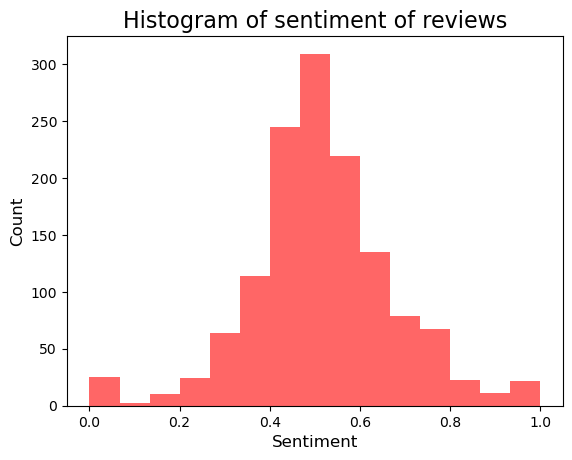

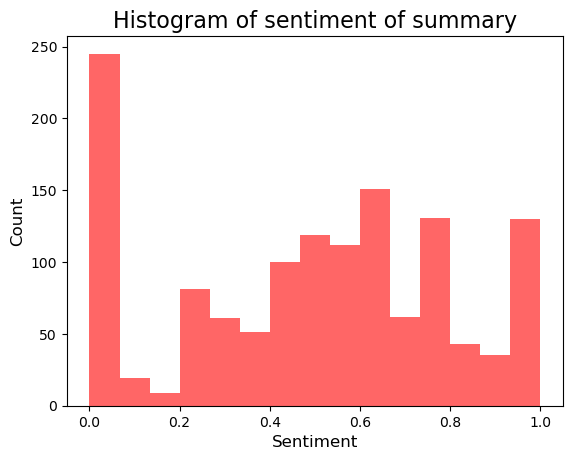

In [32]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity: reviews
num_bins = 15

# Define the bars.
n, bins, patches = plt.hist(df3['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Histogram of polarity: reviews
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity of reviews', fontsize=16)
plt.savefig(r'C:\Users\marti\OneDrive\Documents\GitHub\Read_Martin_DA301_Assignment\Output\NLP_histogram_1.png')
plt.show()

# Histogram of polarity: summary
n, bins, patches = plt.hist(df3['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of polarity of summaries', fontsize=16)
plt.savefig(r'C:\Users\marti\OneDrive\Documents\GitHub\Read_Martin_DA301_Assignment\Output\NLP_histogram_2.png')
plt.show()

# Histogram of sentiment score: reviews
n, bins, patches = plt.hist(df3['review_sentiment'], num_bins, facecolor='red', alpha=0.6)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment of reviews', fontsize=16)
plt.savefig(r'C:\Users\marti\OneDrive\Documents\GitHub\Read_Martin_DA301_Assignment\Output\NLP_histogram_3.png')
plt.show()

# Histogram of sentiment score: summaries
n, bins, patches = plt.hist(df3['summary_sentiment'], num_bins, facecolor='red', alpha=0.6)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment of summary', fontsize=16)
plt.savefig(r'C:\Users\marti\OneDrive\Documents\GitHub\Read_Martin_DA301_Assignment\Output\NLP_histogram_4.png')
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [109]:
# Top 20 negative reviews.
df3_sorted = df3.sort_values(by='review_polarity')
most_negative_reviews = df3_sorted[['review','review_polarity']].head(20)

# View output.
most_negative_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,review_polarity
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
147,incomplete kit very disappointing,-0.780000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741
713,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000
1011,you can play the expansions one at a time or add then both in for a longer game if your into lords of waterdeep this is a must have,-0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000


In [115]:
# Top 20 negative summaries.
df4_sorted = df3.sort_values(by='summary_polarity')
most_negative_summaries = df4_sorted[['summary','summary_polarity']].head(20)

# View output.
most_negative_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
165,boring unless you are a craft person which i am,-1.000000
587,boring,-1.000000
17,the worst value ive ever seen,-1.000000
837,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming methods,-0.700000
637,bad qualityall made of paper,-0.700000
634,too bad this is not what i was expecting,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


In [117]:
# Top 20 positive reviews.
most_positive_reviews = df3_sorted[['review','review_polarity']].tail(20)
most_positive_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,review_polarity
776,this is in my opinion the best dungeon crawler out there it can be setup played and tore down all in under 2 hours it makes a fun ride and is fun with your kids too mine are 5 and 7,0.361111
1024,of the many board games i have played this one is by far my favorite this expansion adds a lot to the game,0.175000
617,we were thrilled to find acquire finally my husband grew up loving this game ordered it for my brother the game requires strategy planning and never ends the same way it is a classic musthave addition for any game closet its a little more time intensive and the board isnt as flashy as newer games but hey it is exciting to play its all about the acquisitions,0.023264
521,my son 25 yr old loves it very much the best feedback i can have a lot of animals and jumbo it is,0.453333
1042,my 5 yearold son absolutely loves this game he happily plays this over and over and over and over from a parents view the storage box is very sturdy as well as the game pieces after a month of daily use the game still looks brand new i would recommend this over the standard memory game any day a mustbuy for any little one that loves construction vehicles,-0.041012
622,i have always loved this game it is as much or more fun than monopoly love building my hotel empire,0.320000
771,if you have anyone in your life that enjoys board games or dd in any form they too will appreciate this its worth the price i purchased it as gift for my eldest son as i playd dd as a kid i wanted to share it with my sonsons therefore i purchased it as a birthday gift and the following evening we all playd we had a blast thank you for the good times,0.333333
407,if you have the pigeon books in your elementary school library and you dont have the pigeon you are missing out our students love the pigeon,0.200000
1008,an excellent expansion to lords of waterdeep and most importantly it adds a sixth player option to the game,0.375000
1114,i bought this doll for my 4 year old boy and for my class as i am a preschool teacher it is perfect the children love it you have to by the animals separately and also the book but this trio will last for years and it is always the favorite hands on story for preschoolers i used to have one in my previous school but it belonged to the school so this time i bought my own set,0.361905


In [120]:
# Top 20 positive summaries.
most_positive_summaries = df4_sorted[['summary','summary_polarity']].tail(20)
most_positive_summaries.style.set_properties(subset=['summary'], **{'width': '400px'})

,summary,summary_polarity
776,best dungeon crawler,1.000000
1024,best expansion ever,1.000000
617,one of the best games,1.000000
521,the best feedback i can have,1.000000
1042,the perfect gift for preschool construction fans,1.000000
622,one of the best,1.000000
771,perfect gift,1.000000
407,the pigeon is the perfect addition to a school library,1.000000
1008,adds a six player option and an excellent expansion,1.000000
1114,perfect for preschoolers,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# The average review polarity indicates a generally positive sentiment (0.181). 
# Additionally, the average summary polarity suggests a slightly more positive sentiment (0.272). 
# Overall, the average review and summary sentiments lean towards positive (0.513 & 0.483).

# 